In [1]:
import cv2
import tensorflow as tf
import numpy as np
import scipy.io
import matplotlib.pyplot as plt


In [27]:
from tensorflow.keras.models import save_model

In [2]:
emnist_dir = '/Users/pushpakumar/Downloads/emnist'
emnist_data = scipy.io.loadmat('emnist-byclass.mat')

In [3]:
x_train = emnist_data['dataset']['train'][0, 0]['images'][0, 0]
y_train = emnist_data['dataset']['train'][0, 0]['labels'][0, 0]
x_test = emnist_data['dataset']['test'][0, 0]['images'][0, 0]
y_test = emnist_data['dataset']['test'][0, 0]['labels'][0, 0]

In [4]:
x_train_ini = x_train.reshape(-1,28 , 28, 1)
x_test_ini = x_test.reshape(-1, 28, 28, 1)

In [5]:
x_train = np.array([np.fliplr(np.rot90(img, k=3)) for img in x_train_ini])
x_test = np.array([np.fliplr(np.rot90(img, k=3)) for img in x_test_ini])

In [6]:
print(x_train.shape)

(697932, 28, 28, 1)


In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

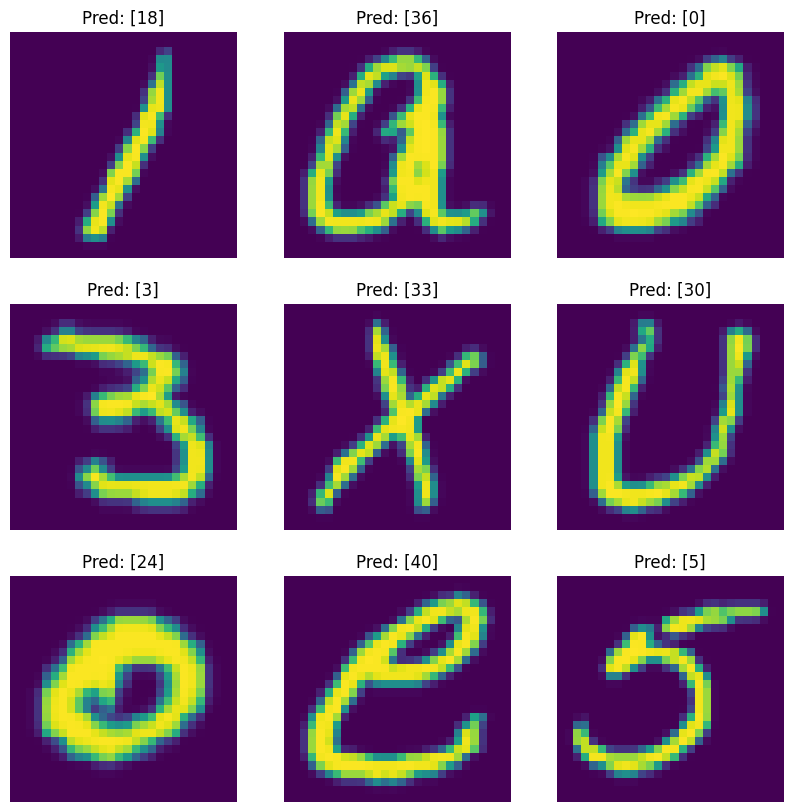

In [8]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i]/255.0)
    plt.title(f'Pred: {y_test[i]}')
    plt.axis("off")
    

In [9]:
no_classes=len(np.unique(y_train))
print(no_classes)

62


In [18]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28,1)),
    
    tf.keras.layers.Conv2D(25, (3, 3), activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(100, (3, 3), activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(250, (3, 3), activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(450,activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(225,activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(120,activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.1), 
    tf.keras.layers.Dense(no_classes, activation='softmax',kernel_initializer = 'he_uniform') 
])

In [19]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 25)     │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 26, 26, 25)     │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 13, 13, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 100)    │        22,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 11, 11, 100)    │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 5, 5, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 3, 3, 250)      │       225,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 3, 3, 250)      │         1,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 1, 1, 250)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1, 1, 250)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 450)            │       112,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 450)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 225)            │       101,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 225)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │        27,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 62)             │         7,502 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 498,647 (1.90 MB)

 Trainable params: 497,897 (1.90 MB)

 Non-trainable params: 750 (2.93 KB)

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
batch_size=128
epochs=10
history= model.fit(x_train, y_train,  batch_size,epochs,validation_data=(x_test,y_test))

Epoch 1/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 1020s 185ms/step - accuracy: 0.6980 - loss: 1.0486 - val_accuracy: 0.8359 - val_loss: 0.4628
Epoch 2/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 910s 167ms/step - accuracy: 0.8219 - loss: 0.5269 - val_accuracy: 0.8427 - val_loss: 0.4423
Epoch 3/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 779s 143ms/step - accuracy: 0.8334 - loss: 0.4862 - val_accuracy: 0.8463 - val_loss: 0.4228
Epoch 4/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 637s 117ms/step - accuracy: 0.8396 - loss: 0.4628 - val_accuracy: 0.8506 - val_loss: 0.4121
Epoch 5/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 725s 133ms/step - accuracy: 0.8418 - loss: 0.4516 - val_accuracy: 0.8533 - val_loss: 0.4047
Epoch 6/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 1080s 198ms/step - accuracy: 0.8447 - loss: 0.4384 - val_accuracy: 0.8525 - val_loss: 0.4095
Epoch 7/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 777s 142ms/step - accuracy: 0.8466 - loss: 0.4323 - val_accuracy: 0.8552 - val_loss: 0.4003
Epoch 8/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 604s 111ms/step - 

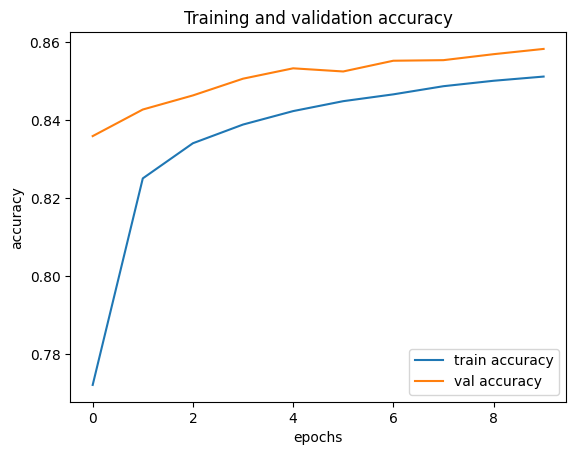

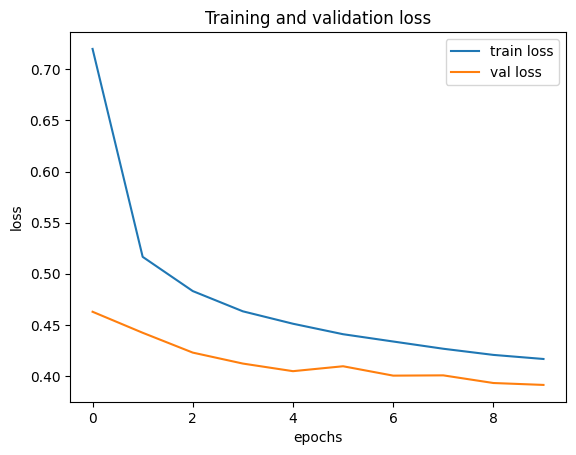

In [28]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs   = range(len(acc))

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title('Training and validation loss')
plt.show()

In [23]:
(loss,accuracy)=model.evaluate(x_test,y_test,batch_size,verbose=1)
print(accuracy*100)

909/909 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8574 - loss: 0.3947
85.82309484481812


In [24]:
predict=model.predict(x_test)

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 61s 17ms/step


In [25]:
predicted_labels = np.argmax(predict, axis=1)

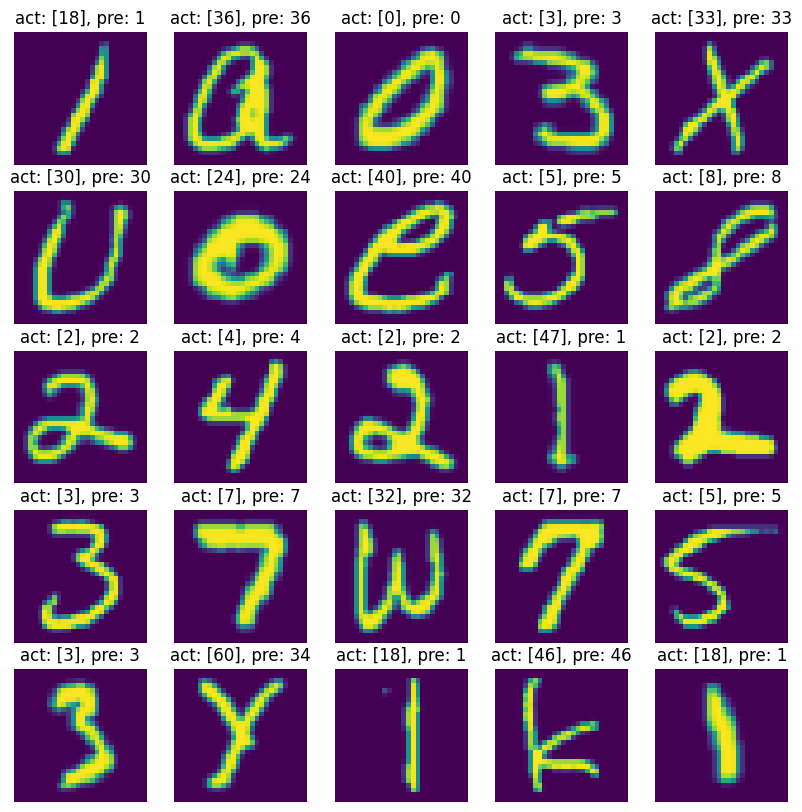

In [26]:
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i]/255.0)
    plt.title(f'act: {y_test[i]}, pre: {predicted_labels[i]}')
    plt.axis("off")

In [29]:
filepath = 'model3_saved.h5'
save_model(model, filepath)